<a href="https://colab.research.google.com/github/Sylvia53/Portfolio/blob/main/%E4%BF%A1%E7%94%A8%E5%8D%A1%E8%A9%90%E6%AC%BA%E6%AA%A2%E6%B8%AC_EDA_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 課程範例
> [信用卡詐欺檢測]
>[來源網址](https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/data)
>[程式筆記本](https://www.kaggle.com/code/tanayatipre/credit-card-fraud-detection-lr-rf-xgb)
---
## 實驗步驟
### 步驟一:讀取數據
### 步驟二:資料分割
### 步驟三:數據探索與清洗
## Troubleshooting（問題與解決方案）
### 問題一:用三種不同的模型測試哪個模型，能夠準確識別詐騙交易。
### 總結:
在本次資料集中所使用的三種模型中，XGBoost 展現出最佳的表現，取得了最高的準確率。
邏輯迴歸（Logistic Regression）達到了97% 準確率，從混淆矩陣來看整體分類結果也相當準確；隨機森林分類器（Random Forest Classifier）則取得了 96% 的準確率，有效地偵測出詐騙行為。而 XGBoost 脫穎而出，以 99% 的準確率成為最有效的模型。

在本資料集中，XGBoost 證明是最有效的詐騙偵測模型，其表現優於邏輯迴歸與隨機森林。

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import The Libraries

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


# Importing Data and performing initial analysis

In [5]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/資料分析數據集/creditcard_2023.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
data = pd.read_csv("/content/drive/MyDrive/資料分析數據集/creditcard_2023.csv")

In [8]:
data.head()


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [10]:
data.shape

(568630, 31)

In [11]:
data.isnull().sum()

,0
id,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


# Data Visualization and Exploration

In [12]:
#Checking Credit card fraud Class
px.histogram(data_frame = data, x='Class', color='Class')

<function matplotlib.pyplot.show(close=None, block=None)>

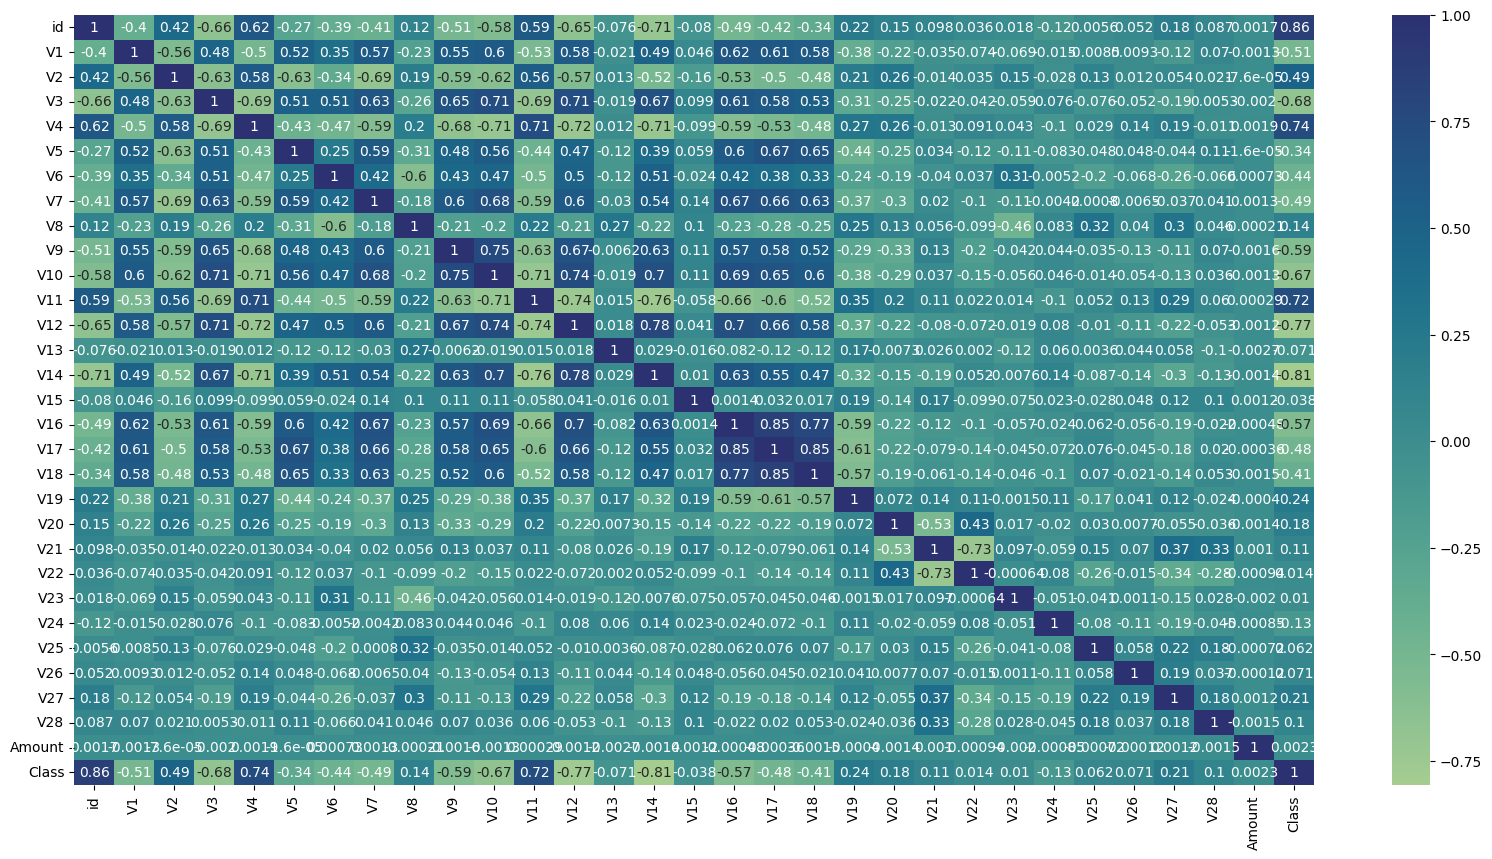

In [13]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), cmap = 'crest', annot = True)
plt.show

In [14]:
data.skew()

,0
id,-6.579536e-16
V1,-8.341717e-02
V2,-1.397952e+00
V3,1.462221e-02
V4,-4.416893e-02
V5,1.506414e+00
V6,-2.016110e-01
V7,1.902687e+01
V8,2.999722e-01
V9,1.710575e-01


正偏態資料（Positively Skewed Data）：

特徵如 V7、V5、V20、V27 和 V28 表現出正偏態。這可從它們的正向平均值看出，其中 V7 尤為明顯，平均值約為 19.03。正偏態表示這些特徵的大多數數值集中在較低的範圍，而數據分布向較高值方向延伸，形成長尾。

負偏態資料（Negatively Skewed Data）：

在提供的資料中，沒有特徵表現出明顯的負偏態。若為負偏態，平均值應偏向負值；但目前所有特徵的平均值都接近零或略為偏正。

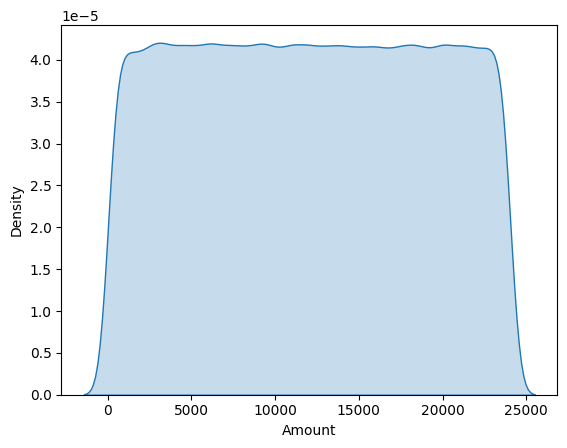

In [15]:
#visualize the distribution of the 'Amount' variable in the dataset using a KDE plot.
sns.kdeplot(data = data['Amount'], fill=True)
plt.show()

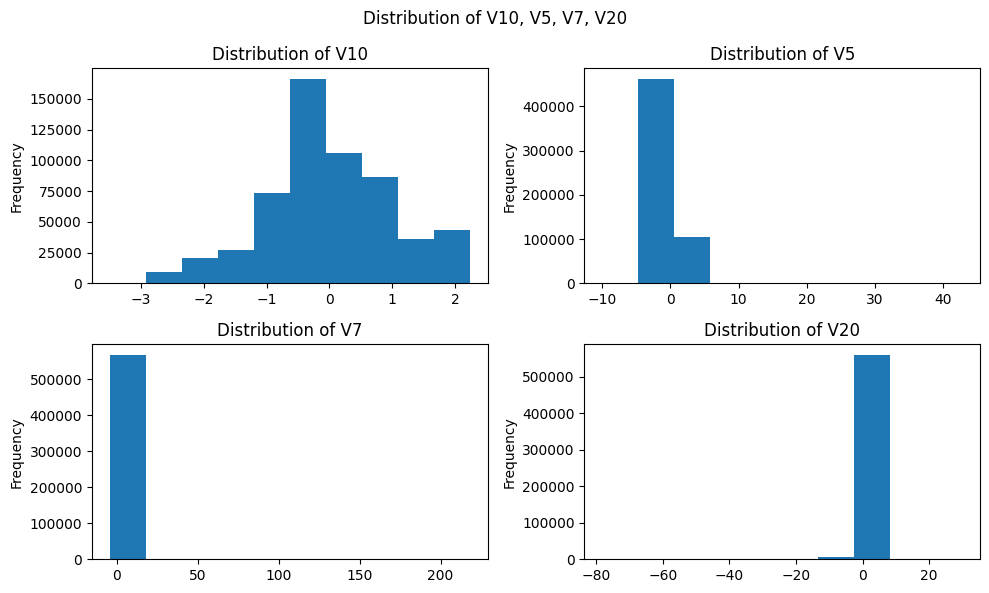

In [16]:
paper, axes = plt.subplots(2, 2, figsize=(10,6))
data['V1'].plot(kind='hist', ax = axes[0,0], title = 'Distribution of V10')
data['V5'].plot(kind='hist', ax = axes[0,1], title = 'Distribution of V5')
data['V7'].plot(kind='hist', ax = axes[1,0], title = 'Distribution of V7')
data['V20'].plot(kind='hist', ax = axes[1,1], title = 'Distribution of V20')
plt.suptitle('Distribution of V10, V5, V7, V20')
plt.tight_layout()

資料中呈現出正偏態的特徵，其中部分特徵的偏態現象較為明顯。目前沒有發現負偏態的情形，且某些特徵看起來具有對稱的分佈。

# Model Implementation

In [17]:
y = data.Class
X = data.drop(['id', 'Class'], axis=1)

In [20]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97


In [21]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [22]:
print(X.shape)
print(y.shape)

(568630, 29)
(568630,)


In [23]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

In [24]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285


In [25]:
import gc
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [26]:
#Splitting the dataset into training and testing.
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size = 0.2, random_state = 5, stratify = y)

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [28]:
LR.fit(X_train, y_train)

LogisticRegression()

In [29]:
lr_predictions_train = LR.predict(X_train)
lr_predictions_test = LR.predict(X_test)

Accuracy Score is: 0.9648013646835376
              precision    recall  f1-score   support

           0       0.95      0.98      0.97    227452
           1       0.98      0.95      0.96    227452

    accuracy                           0.96    454904
   macro avg       0.97      0.96      0.96    454904
weighted avg       0.97      0.96      0.96    454904



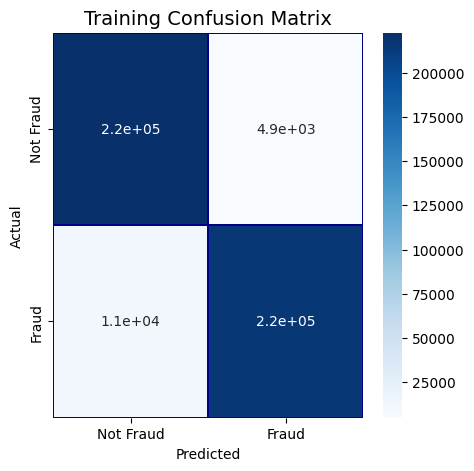

In [30]:
asc = accuracy_score(y_train, lr_predictions_train)
cr = classification_report(y_train, lr_predictions_train)
print("Accuracy Score is:", asc)
print(cr)
cm = pd.crosstab(y_train, lr_predictions_train, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Training Confusion Matrix', fontsize=14)
plt.show()

Accuracy Score is: 0.965698257214709
[[55709  1154]
 [ 2747 54116]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56863
           1       0.98      0.95      0.97     56863

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



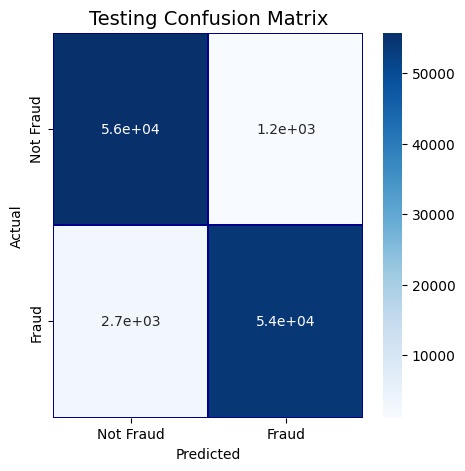

In [31]:
asc = accuracy_score(y_test, lr_predictions_test)
cm = confusion_matrix(y_test, lr_predictions_test)
cr = classification_report(y_test, lr_predictions_test)
print("Accuracy Score is:", asc)
print(cm)
print(cr)

cm = pd.crosstab(y_test, lr_predictions_test, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Testing Confusion Matrix', fontsize=14)
plt.show()

執行邏輯迴歸模型後，我們獲得了高達 97% 的準確率。

檢視混淆矩陣時可以發現，大多數分類都相當正確，僅有少數錯誤分佈其中。針對正常與詐騙交易的精確率（Precision）與召回率（Recall）表現也都相當優異，最終整體的 F1 分數達到 97%。

# Random Forest

In [32]:
RFC = RandomForestClassifier(n_jobs = 4,
                             random_state = 5,
                             n_estimators = 100,
                             max_depth = 5,
                             verbose = False)

In [33]:
#Training the Random Forest Classifier model using the training data.
RFC.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=4, random_state=5, verbose=False)

In [34]:
rf_predictions_train = RFC.predict(X_train)
rf_predictions_test = RFC.predict(X_test)

Accuracy Score is: 0.9544277473928565
              precision    recall  f1-score   support

           0       0.95      0.98      0.97    227452
           1       0.98      0.95      0.96    227452

    accuracy                           0.96    454904
   macro avg       0.97      0.96      0.96    454904
weighted avg       0.97      0.96      0.96    454904



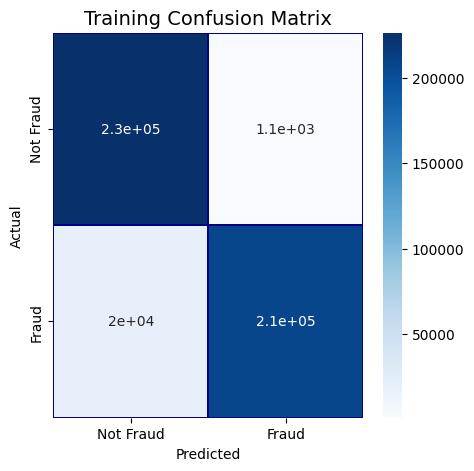

In [35]:
asc = accuracy_score(y_train, rf_predictions_train)
cr = classification_report(y_train, lr_predictions_train)
print("Accuracy Score is:", asc)
print(cr)

# Plot training confusion matrix
cm = pd.crosstab(y_train, rf_predictions_train, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Training Confusion Matrix', fontsize=14)
plt.show()

Accuracy Score is: 0.9551026150572428
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56863
           1       1.00      0.91      0.95     56863

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



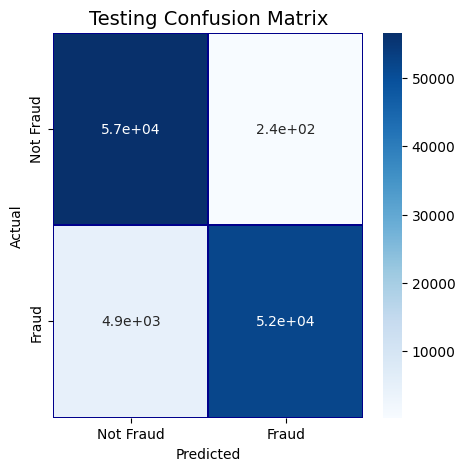

In [36]:
asc = accuracy_score(y_test, rf_predictions_test)
cr = classification_report(y_test, rf_predictions_test)
print("Accuracy Score is:", asc)
print(cr)

# Plot testing confusion matrix
cm = pd.crosstab(y_test, rf_predictions_test, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Testing Confusion Matrix', fontsize=14)
plt.show()

隨機森林分類器（Random Forest Classifier）所得到的準確率為 0.96。

# XGBoost

In [37]:
# Prepare the train and test datasets
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

#Here the focus is on monitoring training and testing.
watchlist = [(dtrain, 'train'), (dtest, 'test')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = 5

In [38]:
model = xgb.train(params,
                dtrain,
                1000,
                watchlist,
                early_stopping_rounds=50,
                maximize=True,
                verbose_eval=50)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:723: FutureWarning:

Pass `evals` as keyword args.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[15:38:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.




[0]	train-auc:0.95851	test-auc:0.95963
[50]	train-auc:0.98641	test-auc:0.98657
[100]	train-auc:0.99083	test-auc:0.99095
[150]	train-auc:0.99358	test-auc:0.99368
[200]	train-auc:0.99506	test-auc:0.99514
[250]	train-auc:0.99613	test-auc:0.99617
[300]	train-auc:0.99687	test-auc:0.99689
[350]	train-auc:0.99740	test-auc:0.99742
[400]	train-auc:0.99784	test-auc:0.99785
[450]	train-auc:0.99818	test-auc:0.99818
[500]	train-auc:0.99843	test-auc:0.99844
[550]	train-auc:0.99866	test-auc:0.99867
[600]	train-auc:0.99887	test-auc:0.99887
[650]	train-auc:0.99901	test-auc:0.99902
[700]	train-auc:0.99914	test-auc:0.99916
[750]	train-auc:0.99925	test-auc:0.99926
[800]	train-auc:0.99933	test-auc:0.99933
[850]	train-auc:0.99940	test-auc:0.99941
[900]	train-auc:0.99947	test-auc:0.99947
[950]	train-auc:0.99953	test-auc:0.99953
[999]	train-auc:0.99957	test-auc:0.99958


In [39]:
xgb_preds = model.predict(dtest)

Accuracy Score is: 0.9871885057066986
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     56863
           1       1.00      0.98      0.99     56863

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726

Confusion Matrix:
[[56624   239]
 [ 1218 55645]]


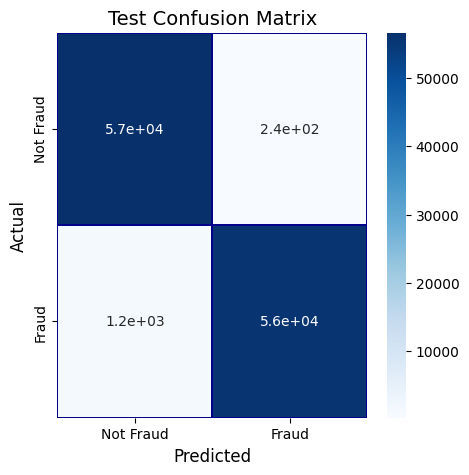

In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert probabilities to binary predictions
threshold = 0.6  # The threshold can be adjusted if needed
binary_preds = np.where(xgb_preds > threshold, 1, 0)

# Calculate accuracy
asc = accuracy_score(y_test, binary_preds)
print("Accuracy Score is:", asc)

# Generate classification report
cr = classification_report(y_test, binary_preds)
print(cr)

# Compute confusion matrix
cm = confusion_matrix(y_test, binary_preds)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,
            linewidths=.2,
            linecolor="Darkblue",
            cmap="Blues")
plt.title('Test Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()